# Day 5 Pandas:

This exercise is all about pandas!

![](pandas.gif)

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 1 Create DataFrames

We want to create some DataFrames with given structure, therefore fill the values with random numbers or categories.
- create one Dataframe by joining two Series, one with the category fruits, which has at least 5 different fruits. the other Series represent the price
- create a 24 x 7 numpy array, and build a DataFrame from it. The column index should be the days of the week, while the row index are the hours.
- write a dictionary containing cities. The city's name should be the key, and the following tuple should be the value for each key: _(population, name-of-country, isCapital, size, location-lat, location-long)_ (google some cities)

In [16]:
# Problem 1
fruits_categories = ["apple","banana","watermelon","orange","dragon_fruit","kaki"]
fruits_prices = np.round(np.random.rand(len(fruits_categories)) *10, decimals=2)

s1 = pd.Series(fruits_categories, dtype="category", name="name")
s2 = pd.Series(fruits_prices, name="price")

df = pd.concat([s1,s2],axis=1)
df

,name,price
0,apple,7.01
1,banana,3.22
2,watermelon,4.51
3,orange,3.05
4,dragon_fruit,3.87
5,kaki,8.80


In [86]:
# Problem 2
data = np.random.rand(24,7) *10

# not really what we are looking for
#col_index = [pd.date_range(start="2020", periods=7, freq="1D")]

# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.dt.day_name.html#pandas.Series.dt.day_name
col_index = pd.date_range(start='2018-01-01', freq='D', periods=7).day_name() # had to look for this!
row_index = pd.timedelta_range(start=0, periods=24, freq="1H")

df = pd.DataFrame(data, columns=col_index, index=row_index)
df

,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
00:00:00,4.969501,3.460525,4.622177,7.117829,4.139698,0.902831,5.329505
01:00:00,1.625041,5.724194,6.163748,2.815471,9.636067,4.979336,5.009417
02:00:00,5.394886,9.461662,1.410706,0.127934,1.520461,8.781350,2.693346
03:00:00,1.107958,6.279936,6.537053,8.703814,3.517630,2.912683,9.872260
04:00:00,9.317217,0.810071,8.848522,5.854353,2.623337,6.004465,3.977602
05:00:00,0.423420,2.500232,5.575444,9.807785,9.592519,0.925598,7.246148
06:00:00,6.691779,2.820570,4.914020,1.377268,7.694425,0.943338,9.824164
07:00:00,8.723985,1.630202,4.177350,4.644993,0.607765,8.357536,5.670179
08:00:00,0.521577,4.221039,6.144924,9.340471,7.158095,5.489692,4.830165
09:00:00,9.464290,1.126630,7.308211,3.884286,1.506301,9.264701,8.242856


## 2 Analyze Data

We want to analyze some data about some car seller. Therefore load the csv file *Automobile_data.csv*. Since the data is not fully clean, Replace all column values which contain ‘?’ and n.a with np.NaN.

Afterwards answer the following questions:
- whats the most expensive car's company name? Print out the car's index, company and price
- Count total cars per company
- Find each company’s Higesht price car
- Find the average mileage for a car of a company
- Whats the average price for a Toyota?
- do all Mercedes have more PS than Toyotas?


In [47]:
df = pd.read_csv("Automobile_data.csv")
df = df.dropna(how='any')
df

,index,company,body-style,wheel-base,length,engine-type,num-of-cylinders,horsepower,average-mileage,price
0,0,alfa-romero,convertible,88.6,168.8,dohc,four,111,21,13495.0
1,1,alfa-romero,convertible,88.6,168.8,dohc,four,111,21,16500.0
2,2,alfa-romero,hatchback,94.5,171.2,ohcv,six,154,19,16500.0
3,3,audi,sedan,99.8,176.6,ohc,four,102,24,13950.0
4,4,audi,sedan,99.4,176.6,ohc,five,115,18,17450.0
5,5,audi,sedan,99.8,177.3,ohc,five,110,19,15250.0
6,6,audi,wagon,105.8,192.7,ohc,five,110,19,18920.0
7,9,bmw,sedan,101.2,176.8,ohc,four,101,23,16430.0
8,10,bmw,sedan,101.2,176.8,ohc,four,101,23,16925.0
9,11,bmw,sedan,101.2,176.8,ohc,six,121,21,20970.0


In [48]:
#problem
df.columns

Index(['index', 'company', 'body-style', 'wheel-base', 'length', 'engine-type',
       'num-of-cylinders', 'horsepower', 'average-mileage', 'price'],
      dtype='object')

In [61]:
# problem 1
df[(df.price.max()==df.price)][['company',"price"]]

,company,price
35,mercedes-benz,45400.0


In [65]:
df.loc[df.price.idxmax(),['company',"price"]]

company    mercedes-benz
price              45400
Name: 35, dtype: object

In [69]:
# problem 3
df.groupby("company")["price"].max()

company
alfa-romero      16500.0
audi             18920.0
bmw              41315.0
chevrolet         6575.0
dodge             6377.0
honda            12945.0
isuzu             6785.0
jaguar           36000.0
mazda            18344.0
mercedes-benz    45400.0
mitsubishi        8189.0
nissan           13499.0
porsche          37028.0
toyota           15750.0
volkswagen        9995.0
volvo            13415.0
Name: price, dtype: float64

In [70]:
# problem 3

df.loc[df.groupby("company")["price"].idxmax()]

,index,company,body-style,wheel-base,length,engine-type,num-of-cylinders,horsepower,average-mileage,price
1,1,alfa-romero,convertible,88.6,168.8,dohc,four,111,21,16500.0
6,6,audi,wagon,105.8,192.7,ohc,five,110,19,18920.0
11,14,bmw,sedan,103.5,193.8,ohc,six,182,16,41315.0
15,18,chevrolet,sedan,94.5,158.8,ohc,four,70,38,6575.0
16,19,dodge,hatchback,93.7,157.3,ohc,four,68,31,6377.0
19,28,honda,sedan,96.5,175.4,ohc,four,101,24,12945.0
21,30,isuzu,sedan,94.3,170.7,ohc,four,78,24,6785.0
26,35,jaguar,sedan,102.0,191.7,ohcv,twelve,262,13,36000.0
31,43,mazda,sedan,104.9,175.0,ohc,four,72,31,18344.0
35,47,mercedes-benz,hardtop,112.0,199.2,ohcv,eight,184,14,45400.0


In [72]:
# problem 4

df.groupby("company")["average-mileage"].mean()

company
alfa-romero      20.333333
audi             20.000000
bmw              19.000000
chevrolet        41.000000
dodge            31.000000
honda            26.333333
isuzu            24.000000
jaguar           14.333333
mazda            28.000000
mercedes-benz    18.000000
mitsubishi       29.500000
nissan           31.400000
porsche          17.000000
toyota           28.714286
volkswagen       31.750000
volvo            23.000000
Name: average-mileage, dtype: float64

In [ ]:
# are all mercedes more expensive than volvos

In [ ]:
df.all(df.price)

## 3 Plotting

Your employer wants to finally get to know his employers. Help him by reading the dataset in _employees.xlsx_ and creating the following plots:
- a histogram for the distrubution of age, with bin size = 5
- a bar chart showing the count for each country

Also, find out the most frequent name of the employees. Whats the likelihood your employer will call the next worker by his correct name? Assume he only remembers the most frequent one.


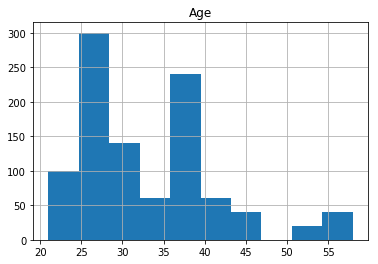

In [75]:
df_employ = pd.read_excel("employees.xlsx")

df_employ.hist("Age")
plt.show()

## 4 One Hot Encoding with Pandas

use the function `pandas.get_dummies()` to one-hot-encode our dataset in ¶_NewStudentPerformance.csv_. The documentation is here: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html. Create a sub-Dataframe, which holds only numerical values. Compare your result with the result in exercise 4.4. You will probably need to move some columns arround, to match the columns! 
Do I have the same encoding?


## 4.1 Custom Index

Extend our dataset with a custom Index, where the index should be the ID of the students. To make you implemented the Index correctly, try to acces students over their ID.

## 5 Advanced: Crime Analyst

You work for the CIS (or BND, just something kinda cool). Your task is to help to prevent crime using data. Therefore read the file _crime.csv_ (this is a very big file, might take some tim to load. You can also cut it by slicing it...) 

First:
- remove the column "SHOOTING", 
- Clean the data, by droping all rows where the data is not complete

fullfil the following tasks:

- in a bar chart, plot the count for each crime type (use the column OFFENSE_CODE_GROUP)
- whats the most crimeful day of the week? month? year?
- show the average crimes per hour in a line chart(x-hour, y-avg no. crime)
- for each district, find the street with the most crimes
- For each district, predict the exact location for the next Robbery